# Tree Regression

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  
from sklearn import metrics  
from sklearn.tree import DecisionTreeRegressor

In [3]:
d=pd.read_csv('g9-proc-reg.csv')

In [4]:
X=d.iloc[:,1:]
y=d.iloc[:,0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [6]:
regressor = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')  
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 47.46310309999999
Mean Squared Error: 4821.708606764065
Root Mean Squared Error: 69.43852393854628


# KNN Regression

In [28]:
from sklearn.neighbors import KNeighborsRegressor

Text(0,0.5,'RMSE')

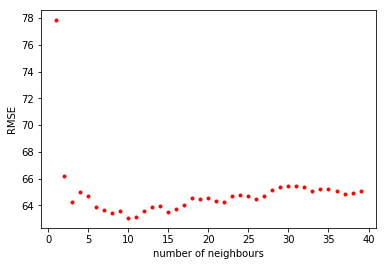

In [38]:
rmse_list=[]
for n_neigh in range(1,40):
    neigh = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=n_neigh, p=2,
          weights='uniform')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)
rmse_list=np.array(rmse_list)
min_rmse_index=np.argmin(rmse_list) # finds the min_samples_leaf with max accuracy
plt.plot(range(1,40),rmse_list,'r.')
plt.xlabel('number of neighbours')
plt.ylabel('RMSE')

In [39]:
print("Accuracy:",rmse_list[min_rmse_index])
min_rmse_index+1

Accuracy: 63.069099485600624


10

In [31]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  